# Data Exploration
## Explainable Fake News Detection using Transformer-based Language Models

**Student Name:** Abdullah  
**Reg Number:** M24F0044DS009  
**Course:** Natural Language Processing  

### Objective
The objective of this notebook is to explore and understand the fake news dataset before applying Transformer-based models. This includes analyzing data distribution, class balance, and textual characteristics to justify the modeling choices.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Load training and test datasets
train_df = pd.read_csv("../data/shorttextpreprocessedtrain.csv")
test_df = pd.read_csv("../data/shorttextpreprocessedtest.csv")

# Display first few rows
train_df.head()


,text,label
0,phil robertson of duck dynasty has endorsed do...,0
1,san francisco ap — apple penalized ceo tim coo...,1
2,if we use tax increment financing funding that...,0
3,roughly georgians or about percent of the stat...,1
4,stunned that did not concede if pulled that pe...,0


In [3]:
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

print("\nTraining Columns:")
print(train_df.columns)


Training Data Shape: (25336, 2)
Test Data Shape: (6525, 2)

Training Columns:
Index(['text', 'label'], dtype='object')


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25336 entries, 0 to 25335
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25336 non-null  object
 1   label   25336 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 396.0+ KB


In [5]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

- There is no missing value in datset

In [6]:
label_counts = train_df['label'].value_counts()
label_counts


label
0    21390
1     3946
Name: count, dtype: int64

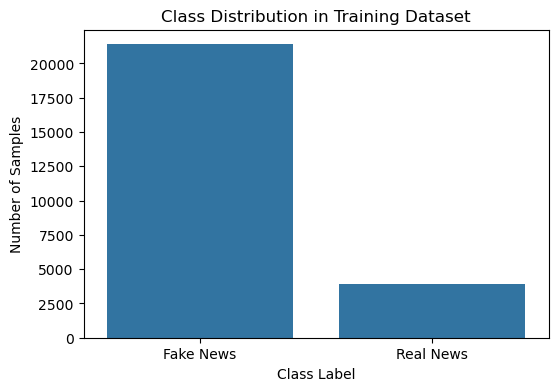

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks([0,1], ['Fake News', 'Real News'])
plt.title("Class Distribution in Training Dataset")
plt.ylabel("Number of Samples")
plt.xlabel("Class Label")
plt.show()


In [8]:
# Add text length column
train_df['text_length'] = train_df['text'].apply(len)

train_df['text_length'].describe()


count    25336.000000
mean        86.544166
std         43.150467
min          1.000000
25%         57.000000
50%         81.000000
75%        108.000000
max        276.000000
Name: text_length, dtype: float64

In [9]:
# Display sample fake and real news texts
print("Sample Fake News Text:\n")
print(train_df[train_df['label'] == 0]['text'].iloc[0])

print("\nSample Real News Text:\n")
print(train_df[train_df['label'] == 1]['text'].iloc[0])


Sample Fake News Text:

phil robertson of duck dynasty has endorsed donald trump and weighs in on the two hottest topics on trump

Sample Real News Text:

san francisco ap — apple penalized ceo tim cook for the iphone maker’s first sales slump in years with a percent pay cut advertisement


## Key Observations

- The dataset is clean and well-structured with no missing values.
- The target variable is binary, representing Fake and Real news.
- Some class imbalance exists, which will be handled using appropriate evaluation metrics.
- Text lengths vary significantly, making Transformer-based models suitable.
- The dataset is appropriate for fine-tuning a pre-trained BERT model.

This exploratory analysis justifies the use of Transformer-based language models for fake news detection.
